<p><h1>SFW <small> - Stefanini Fashion Week</small></h1></p>

A Stefanini estava se preparando para realizar a primeira Fashion Week tecnológica do mundo, sua roupas são feitas com tecnologia de ponta, algumas contendo até inteligência artificial para se adaptar aos gostos que seus clientes. Porém, como foi a primeira vez que a Stefanini está realizando um evento desse estilo nem tudo poderia ser perfeito, as roupas que deveriam chegar uma semana antes estavam previstas para chegar algumas horas antes do evento.

Como é uma quantidade absurda de roupas, um ser humano não ia conseguir classificar e separar tudo a tempo, porém como a Stefanini tem funcionários experientes na área de inteligência artificial, foi então demandado a eles treinar um algoritmo capaz de classificar as roupas entre:

- 0 - Camiseta
- 1 - Calça
- 2 - Pulôver
- 3 - Vestido
- 4 - Casaco
- 5 - Sandália
- 6 - Camisa
- 7 - Tênis
- 8 - Bolsa
- 9 - Tornozeleira

O Dataset a ser utilizado para desenvolver esse modelo foi o famoso Fashion-Mnist e foi carregado pelo tensorflow.

É exigido que para esse modelo seja feito um <b>Multilayer Perceptron</b>. O Framework a ser escolhido é de preferência do desenvolvedor.

<b>É necessário por comentários explicando o código</b>

\* <small>Quem desenvolver o modelo em Numpy terá uma melhor avaliação que os demais</small>

### Importações necessárias

# Exercício
## Autor: Matheus Jericó Palhares
## Email: matheusjerico1994@hotmail.com
## linkedIn: https://www.linkedin.com/in/matheusjerico

## MLP com framework Keras;

In [1]:
import matplotlib.pyplot  as plt
from tensorflow.keras.datasets import fashion_mnist
from keras import backend as K

Using TensorFlow backend.


#### Carregando o dataset a ser trabalhado

In [2]:
# Separando dados de treino e teste
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


# Verificando formato das imagens
print("X_train.shape: {}".format(X_train.shape))
print("y_train.shape: {}".format(y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_test.shape: {}".format(y_test.shape))

X_train.shape: (60000, 28, 28)
y_train.shape: (60000,)
X_test.shape: (10000, 28, 28)
y_test.shape: (10000,)


Exemplos de imagens: 


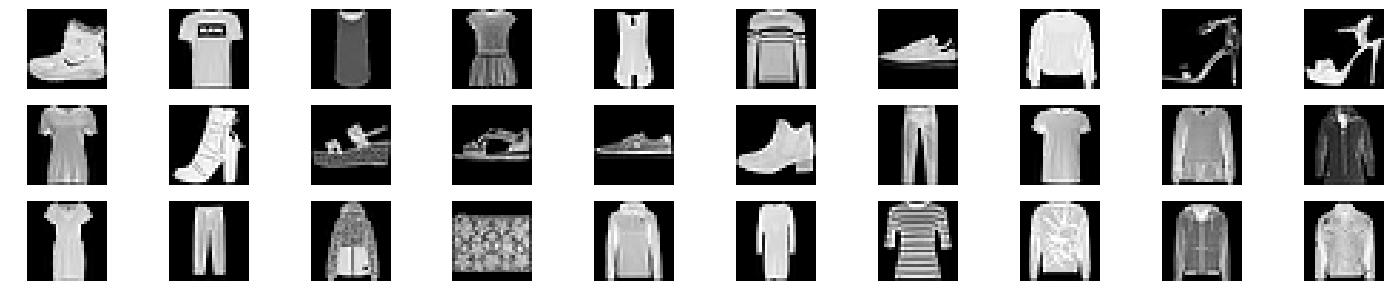

In [3]:
# Mostrando o dataset
fig, axs = plt.subplots(3,10, figsize=(25,5))
axs = axs.flatten()

for img, ax in zip(X_train[:30], axs):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

print('Exemplos de imagens: ')
plt.show()

## To be continued...

## - Implementando MLP com o framework Keras

In [4]:
# Importando biblioteca numpy
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import Flatten, Dense, Activation, BatchNormalization, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, multilabel_confusion_matrix

## 1. Pré-processamento dos dados

- Fazendo reshape:
    - Backend utilizando o tensor_flow: O formato da imagem é 'channels_last', coloca-se a profundidade da imagem no final;
    - Backend utilizando o Theano: O formato da imagem é 'channels_first', coloca-se a profundidade da imagem no início.
    
O código abaixo eu automatizo essa decisão, utilizando a função keras.backend.image_data_format(), a resposta da função é uma string: 'channels_first' para Theano como beckend e 'channels_last' para tensor_flow como beckend.

Como foi usado o tensor_flow de backend para o Keras, então o formato da imagem é 'channels_last'.

Já seto o parâmetro (input_shape) a ser passado na camada de entrada da MLP.

In [5]:
imagem_linhas = 28
imagem_colunas = 28

if K.image_data_format() == 'channels_first':
    print("image_data_format: channels_first")
    X_train = X_train.reshape(X_train.shape[0], 1, imagem_linhas, imagem_colunas)
    X_test = X_test.reshape(X_test.shape[0], 1, imagem_linhas, imagem_colunas)
    inputShape = (1, imagem_linhas, imagem_colunas)
else:
    print("image_data_format: channels_last")
    X_train = X_train.reshape(X_train.shape[0], imagem_linhas, imagem_colunas, 1)
    X_test = X_test.reshape(X_test.shape[0], imagem_linhas, imagem_colunas, 1)
    inputShape = (imagem_linhas, imagem_colunas, 1)

image_data_format: channels_last


- Após realizar o reshape da imagem adicionando a profundidade, verifico a modificação:

In [6]:
# Confirmando as dimensões dos X's
print('X_train.shape: {}'.format(X_train.shape))
print('X_test.shape: {}'.format(X_test.shape))

X_train.shape: (60000, 28, 28, 1)
X_test.shape: (10000, 28, 28, 1)


#### 1.1 Pré-processamento das variáveis X's:
    - Transformo em array do tipo 'float' e divido por 255 para normalização os dados;
    - Os valores das matrizes das imagens que antes estavam entre 0 a 255, agora variam de 0 a 1.

In [7]:
# Transformando dados em float32 e normalizando (dados com valores de 0 até 1)
X_train = np.array(X_train, dtype='float32') / 255.
X_test = np.array(X_test, dtype='float32') / 255.

#### 1.2 Pré-processamento das variáveis Y's:
    - Faço a verificação do formato dos labels, estão variando de 0 a 9 (apenas uma dimensão);
    - Faço a categorização para transformar os labels de uma dimensão para dez dimensões;

Exemplo:
    - O label do número '2' é o 2.
    - Após a categorização o label '2' vai passar a ser uma representação em formato de array com múltiplas dimensões:
    - [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
    
    

In [8]:
# Verificando o formato dos labels
print("y_train.shape: {}".format(y_train.shape))

# Visualizando os 5 primeiros labels no y_train
print('Os 5 primeiros labels do y_train: {}'.format(y_train[:5]))

y_train.shape: (60000,)
Os 5 primeiros labels do y_train: [9 0 0 3 0]


- Faço a categorização dos labels:

In [9]:
# Categorizando dos Y's
# Converter o array que possui apenas 1 dimensão, em um array com 10 dimensões.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
# Verificando as dimensões do array.
print('y_train.shape: {}'.format(y_train.shape))
print('y_test.shape: {}'.format(y_test.shape))

# Visualizando os 5 primeiros labels no y_train após categorização
print('Os 5 primeiros labels do y_train:\n {}'.format(y_train[:5]))

y_train.shape: (60000, 10)
y_test.shape: (10000, 10)
Os 5 primeiros labels do y_train:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


#### 1.3 Colocando os nomes das classes em uma variável para apresentação posterior

In [11]:
# Colocando os nomes das classes em uma variável
nomeClasses = ["Camiseta", "Calça", "Pulôver", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Tornozeleira"]

## 2. Criando modelo com MLP

- Flatten(): Transformar a imagem que está em formato de matriz para o formato de vetor;
- Dense(): Camada densa da Rede neural, a primeira camada Dense tem que ter o parâmetro de input_shape com a dimensão da imagem e profundidade. A quantidade de nodes para a primeira camada foi 28 x 28 (tamanho da imagem);
- Activation(): Função de ativação, optei por utilizar a ReLu pois tenho um bom resultado com ela;
- BatchNormalization(): Utilizado para normalizar as ativações da camada anterior, obtive uma melhora na acurácia e uma menor probabilidade de ocorrer overfitting;
- Dropout(): Aplicado para prevenir overfitting durante o treinamento, 'cancela' 20% (parâmetro selecionado) das ligações entre nodes.

Reduzi o número de nodes pela metade em cada camada Densa, até que na camada de saída tenho 10 nodes, pois temos 10 classes a serem classificadas.

Função utilizada na camada de saída foi a 'softmax', apresenta a probabilidade de classificação de cada classe, fazendo a selecão da classe que tem maior probabilidade.


In [12]:
# Criando o modelo
model = Sequential()

# Flatten
model.add(Flatten())

# Camada de entrada
model.add(Dense(784, input_shape = (28, 28, 1)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Camada oculta
model.add(Dense(392))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Camada oculta
model.add(Dense(196))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Camada oculta
model.add(Dense(98))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Camada de saida
model.add(Dense(10))
model.add(Activation("softmax"))

In [13]:
# Parametros
NUM_EPOCHS = 25
INIT_LR = 1e-2
BS = 32
EPOCHS = 40

# Optimizador
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)

Instructions for updating:
Colocations handled automatically by placer.


### 2.1 Compilando o Modelo
- loss: 'categorical_crossentropy' utilizado pois é uma classificação com mais de 2 classes;
- optimizer: SGD. Backpropagation.

In [14]:
# Compilar modelo
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics= ['accuracy'])

### 2.2 Treinando o modelo
- Passo os dados de treino, tamanho do lote, épocas e os dados de validação.

In [15]:
# Fit no modelo
H1 = model.fit(X_train, y_train, batch_size=BS, epochs= EPOCHS, verbose=1, validation_data=(X_test, y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 44s 741us/step - loss: 0.5765 - acc: 0.7930 - val_loss: 0.4325 - val_acc: 0.8397
Epoch 2/40
60000/60000 [==============================] - 43s 717us/step - loss: 0.4419 - acc: 0.8407 - val_loss: 0.3805 - val_acc: 0.8642
Epoch 3/40
60000/60000 [==============================] - 44s 734us/step - loss: 0.4033 - acc: 0.8547 - val_loss: 0.4059 - val_acc: 0.8552
Epoch 4/40
60000/60000 [==============================] - 49s 820us/step - loss: 0.3800 - acc: 0.8629 - val_loss: 0.3603 - val_acc: 0.8687
Epoch 5/40
60000/60000 [==============================] - 40s 671us/step - loss: 0.3650 - acc: 0.8669 - val_loss: 0.3419 - val_acc: 0.8749
Epoch 6/40
60000/60000 [==============================] - 43s 717us/step - loss: 0.3500 - ac

### 3. Avaliando modelo MLP
- Utilizo a função evaluate() para obter a acurácia e o erro nos dados de teste

In [16]:
# Mostrando resultados
scores = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 292us/step


In [17]:
# Mostrando o erro e acurácia do modelo MLP
print("Loss do Modelo MLP: {:.5}%".format(scores[0]*100))
print("Accuracy do Modelo MLP: {:.5}%".format(scores[1]*100))

Loss do Modelo MLP: 29.513%
Accuracy do Modelo MLP: 89.94%


#### 3.1 Predição do modelo MLP
- Utilizo a função predict_classes() para fazer a predição dos dados de teste.
- Categorizo a predição.

In [18]:
preds = model.predict_classes(X_test)
print(preds[1])
preds = to_categorical(preds)
print(preds[1])

2
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


- Avaliando o modelo com a função classification_report(): obtenho as metricas de precisão, recall e f1-score, além da quantidade de imagens para cada classificação

In [19]:
# Mostrando precisão, recall e f1-score do modelo MLP
print(classification_report(y_test, preds, target_names = nomeClasses))

              precision    recall  f1-score   support

    Camiseta       0.86      0.84      0.85      1000
       Calça       0.99      0.97      0.98      1000
     Pulôver       0.83      0.82      0.82      1000
     Vestido       0.90      0.91      0.91      1000
      Casaco       0.82      0.84      0.83      1000
    Sandália       0.99      0.97      0.98      1000
      Camisa       0.73      0.75      0.74      1000
       Tênis       0.95      0.96      0.95      1000
       Bolsa       0.98      0.98      0.98      1000
Tornozeleira       0.95      0.97      0.96      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000
 samples avg       0.90      0.90      0.90     10000



- Utilizo a função multilabel_confusion_matrix() para verificar a matriz de confusão de cada label

In [20]:
# Matriz de confusão do Modelo MLP
matriz_confusão = multilabel_confusion_matrix(y_test, preds)

In [21]:
# Visualizando matriz de confusão do Modelo MLP
for i, matriz in enumerate(matriz_confusão):
    print("\nMatriz de confusão da classificação do número: {}".format(i))
    print(matriz)


Matriz de confusão da classificação do número: 0
[[8867  133]
 [ 160  840]]

Matriz de confusão da classificação do número: 1
[[8994    6]
 [  27  973]]

Matriz de confusão da classificação do número: 2
[[8829  171]
 [ 184  816]]

Matriz de confusão da classificação do número: 3
[[8902   98]
 [  91  909]]

Matriz de confusão da classificação do número: 4
[[8812  188]
 [ 161  839]]

Matriz de confusão da classificação do número: 5
[[8987   13]
 [  33  967]]

Matriz de confusão da classificação do número: 6
[[8721  279]
 [ 254  746]]

Matriz de confusão da classificação do número: 7
[[8951   49]
 [  42  958]]

Matriz de confusão da classificação do número: 8
[[8978   22]
 [  24  976]]

Matriz de confusão da classificação do número: 9
[[8953   47]
 [  30  970]]


### 4. Gráfico de rendimento do Modelo MLP de acordo com as Épocas


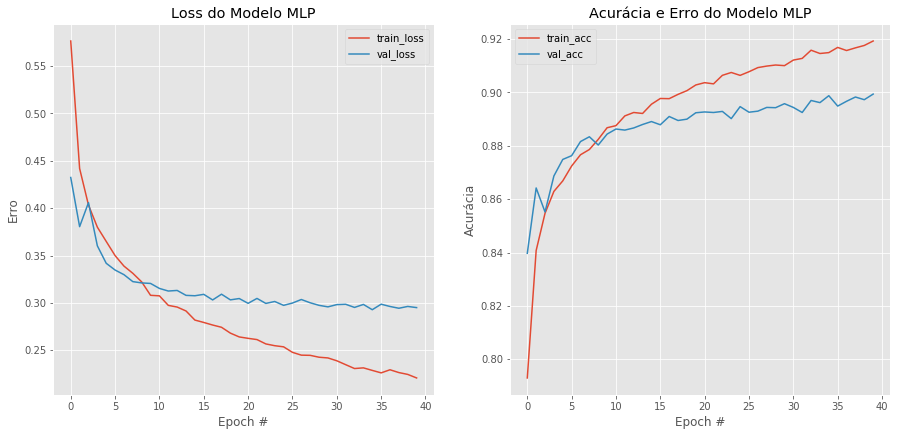

In [22]:
# Plotando gráfico de rendimento do Modelo MLP
N = EPOCHS
plt.style.use("ggplot")
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.title("Loss do Modelo MLP")
plt.plot(np.arange(0, N), H1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H1.history["val_loss"], label="val_loss")
plt.xlabel("Epoch #")
plt.ylabel("Erro")
plt.legend()

plt.subplot(222)
plt.title("Acurácia e Erro do Modelo MLP")
plt.plot(np.arange(0, N), H1.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H1.history["val_acc"], label="val_acc")
plt.title("Acurácia e Erro do Modelo MLP")
plt.xlabel("Epoch #")
plt.ylabel("Acurácia")
plt.legend()